In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("health_data_linear_regression.csv")

In [5]:
df

,Age,BMI,Exercise_Hours,Blood_Pressure
0,58,25.197825,3.259589,108.520463
1,48,24.712986,2.202410,98.911912
2,34,22.989299,7.111495,107.222337
3,62,18.239357,8.095010,118.080463
4,27,21.380321,3.486660,96.210523
...,...,...,...,...
95,34,31.571867,3.225508,87.548683
96,64,20.562198,8.486698,128.072420
97,20,26.639379,1.366213,91.459067
98,44,29.828818,7.089110,91.004270


In [9]:
df.head()

,Age,BMI,Exercise_Hours,Blood_Pressure
0,58,25.197825,3.259589,108.520463
1,48,24.712986,2.202410,98.911912
2,34,22.989299,7.111495,107.222337
3,62,18.239357,8.095010,118.080463
4,27,21.380321,3.486660,96.210523


In [13]:
df.describe()

,Age,BMI,Exercise_Hours,Blood_Pressure
count,100.000000,100.000000,100.000000,100.000000
mean,44.070000,26.228076,5.445911,103.917672
std,14.447575,4.603325,2.792142,10.524223
min,20.000000,18.008846,0.180754,81.012275
25%,33.000000,22.344012,3.056137,96.222987
50%,43.000000,25.878099,5.295997,104.241791
75%,58.000000,29.814451,7.913807,110.403606
max,69.000000,34.961588,9.962537,128.072420


In [15]:
df.isnull().sum()  #no missing value

Age               0
BMI               0
Exercise_Hours    0
Blood_Pressure    0
dtype: int64

In [25]:
# relation btw age vs blood pressure
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

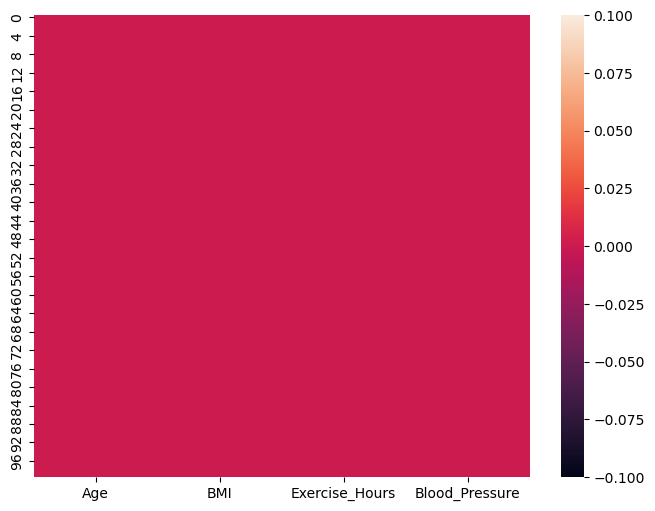

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())


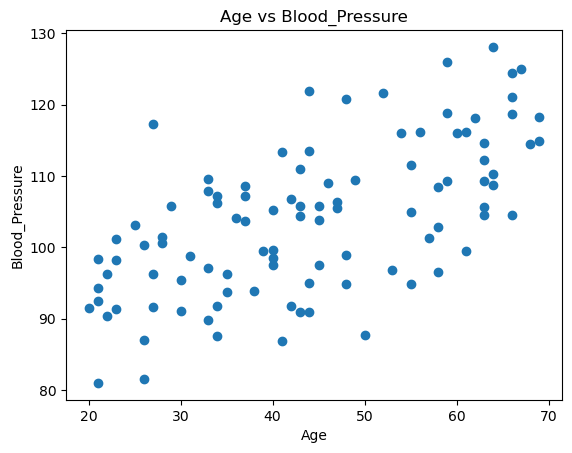

In [31]:
plt.scatter(df['Age'],df['Blood_Pressure'])
plt.xlabel('Age')
plt.ylabel('Blood_Pressure')
plt.title('Age vs Blood_Pressure')
plt.show()

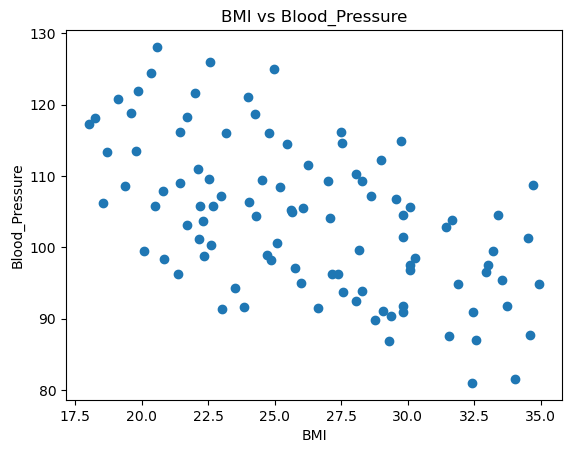

In [33]:
plt.scatter(df['BMI'],df['Blood_Pressure'])
plt.xlabel('BMI')
plt.ylabel('Blood_Pressure')
plt.title('BMI vs Blood_Pressure')
plt.show()

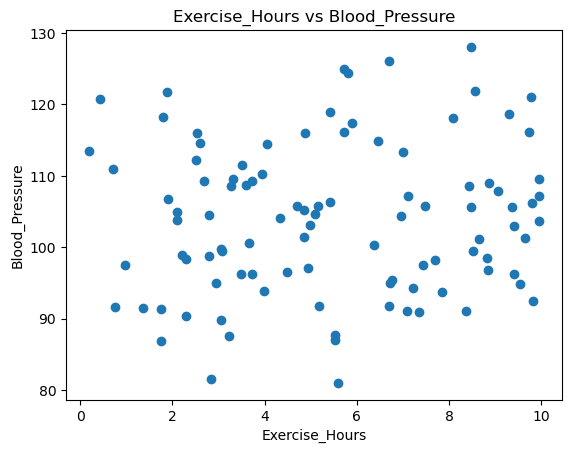

In [37]:
plt.scatter(df['Exercise_Hours'],df['Blood_Pressure'])
plt.xlabel('Exercise_Hours')
plt.ylabel('Blood_Pressure')
plt.title('Exercise_Hours vs Blood_Pressure')
plt.show()

In [49]:
X=df[['Age','BMI','Exercise_Hours']]
y=df['Blood_Pressure']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating metrics for accuracy
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared (Coefficient of Determination)

# Displaying the results
mse, r2


(26.202150794768936, 0.6903662283700209)

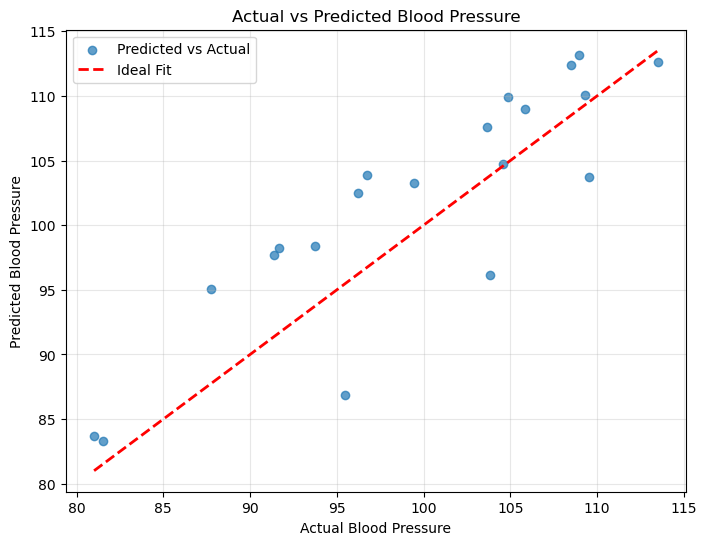

In [63]:
# Plotting actual vs predicted values after linear regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')

plt.title('Actual vs Predicted Blood Pressure')
plt.xlabel('Actual Blood Pressure')
plt.ylabel('Predicted Blood Pressure')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [65]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Evaluate Ridge Regression
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge MSE:", ridge_mse)
print("Ridge R²:", ridge_r2)

# Repeat for Lasso Regression


Ridge MSE: 26.199423159260146
Ridge R²: 0.6903984611465146
